In [1]:
import pandas as pd 
df = pd.read_csv("Admission_Predict1.csv",sep = ",")

df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [2]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [4]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:

df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
80,81,312,105,3,2.0,3.0,8.02,1,0.50
303,304,323,107,3,3.5,3.5,8.55,1,0.73
272,273,294,95,1,1.5,1.5,7.64,0,0.49
147,148,326,114,3,3.0,3.0,9.11,1,0.83
75,76,329,114,2,2.0,4.0,8.56,1,0.72


In [6]:
y = df["Chance of Admit "]
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [7]:
x=df.drop(["Chance of Admit ", "Serial No."],axis=1)
x.head()    

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [9]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [10]:
y_train

3      0.80
18     0.63
202    0.97
250    0.74
274    0.58
       ... 
71     0.96
106    0.87
270    0.72
348    0.57
102    0.62
Name: Chance of Admit , Length: 320, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0,1))
x_train[x_train.columns]=scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns]=scalerX.transform(x_test[x_test.columns])
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
18,0.56,0.642857,0.50,0.750,0.500,0.641026,0.0
202,1.00,1.000000,1.00,0.875,0.875,0.996795,1.0
250,0.60,0.428571,0.50,0.500,0.375,0.567308,1.0
274,0.50,0.285714,0.00,0.250,0.375,0.368590,0.0
...,...,...,...,...,...,...,...
71,0.92,0.714286,1.00,1.000,1.000,0.948718,1.0
106,0.78,0.678571,0.75,0.875,0.875,0.762821,1.0
270,0.32,0.464286,0.25,0.375,0.500,0.455128,1.0
348,0.24,0.250000,0.00,0.250,0.250,0.144231,0.0


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
score=model.score(x_test,y_test)
print(score)
print(y_predict[0:5])
print(y_test[0:5])


0.8212082591486992
[0.65117446 0.72368741 0.93536809 0.82164316 0.58158673]
209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
Name: Chance of Admit , dtype: float64


In [13]:

gre=int(input("what is your Gre score (btw 290 to 340): "))
toe=int(input("what is your toel score (btw 90 to 120): "))
univ=int(input("what is your university (rating 1 to 5): "))
sop=int(input("waht is your rate sattement (btw 1 to 5): "))
lor=int(input("what is strength of your letter of recommendation 1 to 5: "))
cgpa=int(input("what is cgpa (6 to 10): "))
research=int(input("do you have reserarch expericence (0 to 1): "))
newx=[[gre,toe,univ,sop,lor,cgpa,research]]
newy=model.predict(newx)
print("your Chance of Admission is:",newy)

your Chance of Admission is: [37.97796142]


C:\Users\astha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train,y_train)
y_predict_rfr=rfr.score(x_test,y_test)
print(y_predict_rfr*100)

80.81465049510042


In [20]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(x_train,y_train)
y_predict_dtr=dtr.predict(x_test)
score_dtr=dtr.score(x_test,y_test)
print(score_dtr*100)

63.260008652534204


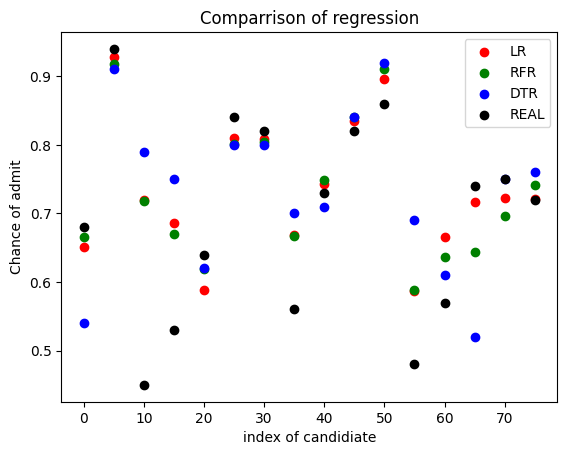

In [28]:
import numpy as np
import matplotlib.pyplot as plt

red =plt.scatter(np.arange(0,80,5),y_predict[0:80:5],color="red")
green = plt.scatter(np.arange(0,80,5),y_predict_rfr[0:80:5],color="green")
blue=plt.scatter(np.arange(0,80,5),y_predict_dtr[0:80:5],color="blue")
black=plt.scatter(np.arange(0,80,5),y_test[0:80:5],color="black")
plt.title("Comparrison of regression")
plt.xlabel("index of candidiate")
plt.ylabel("Chance of admit")
plt.legend((red,green,blue,black),('LR','RFR','DTR','REAL'))
plt.show()